# Klasifikasi Kanker Payudara menggunakan Decision Tree Classifier

Proyek ini dibuat dalam rangka penugasan workshop data science pada mata kuliah Bimbingan Karier di Universitas Dian Nuswantoro

**Identitas**
* Nama: Jeremyas Cornelis Abigail Wihardjono
* NIM: A11.2020.12415

**Link Dataset** <br>
http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data

**Informasi mengenai dataset Breast Cancer**
* https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
* https://rpubs.com/Kevin_Nguyen_Tran/662211
* https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


## 1. Mengumpulkan Data

1. Mengambil dataset dari UCI Dataset
2. Mengunduh file dataset tersebut

**Tentang Dataset**
diberikan sebuah dataset bernama Breast Cancer dataset dimana pada dataset tersebut terdapat:
* Total 30 atribut variabel independen dan 1 variabel dependen yaitu diagnosis, sedangkan 1 atribut lainnya tidak digunakan yaitu atribut ID
* Variabel Dependen adalah diagnosis dimana terbagi menjadi 2 kategori, yaitu:
    * M (malignant) = Kanker Ganas
    * B (benign) = Kanker Jinak
* Data pasien penderita kanker yang digunakan sebanyak 569 data

## 2. Menelaah Data
tahapannya terdiri dari:
* Load library yang diperlukan
* Load dataset
* Memberi nama header atribut
* Menganalisa tipe dan relasi data (melihat tipe dataset, ukuran dataset, distribusi class, dan deskripsi dataset).
* Memberikan laporan atau kesimpulan dari kegiatan menelaah data.

In [1]:
# load library yang diperlukan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import matplotlib.image as mpimg
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import tree
from IPython.display import Image

In [2]:
# load dataset

dataset = pd.read_csv("breastcancer.csv", header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
dataset.shape

(569, 32)

In [4]:
# Memberikan penamaan kolom-kolom pada dataset

dataset.columns = ['id', 'diagnosis', 'radius_mean', 
                   'texture_mean', 'perimeter_mean', 
                   'area_mean', 'smoothness_mean', 'compactness_mean', 
                   'concavity_mean', 'concave points_mean', 'symmetry_mean',
                   'fractal_dimension_mean', 'radius_se', 'texture_se',
                   'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
                   'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
                   'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
                   'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [5]:
dataset.to_csv('breastcancer_with_header.csv', index=False)

In [6]:
dataset = pd.read_csv("breastcancer_with_header.csv")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Menganalisa tipe dan relasi data

# Melihat tipe dataset
type(dataset)

pandas.core.frame.DataFrame

In [8]:
# Melihat ukuran dataset
print(dataset.shape)

(569, 32)


In [9]:
# Melihat informasi tipe data semua kolom
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
# Melihat distribusi Class (apa saja jenisnya)
dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [11]:
dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

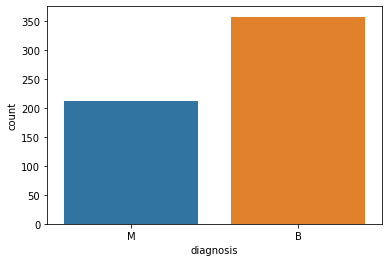

In [14]:
# Melihat distribusi Class (jumlahnya tiap Class)
sns.countplot(data=dataset, x='diagnosis')

In [19]:
# hapus kolom "Id"

dataset = dataset.drop(labels="id", axis=1)

In [20]:
# Melihat deskripsi dataset
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Kesimpulan 
* Tipe datanya adalah float64, untuk kolom diagnosis bertipe Object
* Jumlah fitur (30) lebih sedikit dibandingkan dengan jumlah record data pasien (569) maka termasuk **Low Dimensional Dataset**
* Jumlah distribusi diagnosis:
    * class M sebanyak 212 pasien
    * class B sebanyak 357 pasien

## 3. Memvalidasi Data

In [21]:
# mengecek apakah ada data yang bernilai null atau tidak
dataset.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## 4. Menentukan Objek Data

Objek data pada dataset Breast Cancer Wisconsin adalah diagnosis, fitur-gitur berbasis pengukuran, serta variasi rata-rata, standar deviasi, dan nilai maksimum/terburuk dari fitur-fitur tersebut. <br>
Adapun rinciannya sebagai berikut:

1. Target: kolom diagnosis terdiri dari 2:
    * "M" untuk tumor ganas 
    * "B" untuk tumor jinak
2. Fitur-fitur berbasis pengukuran dari sel-sel tumor yang telah diamati melalui mikroskop seperti:
    * `radius_mean` : Rata-rata jarak dari pusat ke titik-titik pada tepi tumor
    * `texture_mean` : Standar deviasi tingkat kecerahan pada gambar sel tumor
    * `perimeter_mean` : Panjang total garis tengah pada tepi tumor
    * `area_mean` : Area di dalam kontur tumor
    * `smoothness_mean` : variasi lokal dalam panjang garis pada kontur tumor.
    * `compactness_mean` : Perbandingan keliling kuadrat dengan luas - 1.0 atau penulisan rumusnya: (perimeter^2 / area) - 1.0.
    * `concavity_mean` : Tingkat keparahan bagian cekung dari kontur tumor
    * `concave points_mean` : Jumlah titik konveks pada kontur tumor
    * `symmetry_mean` : Simetri sel tumor
    * `fractial_dimension_mean` : perkiraan kurva sejajar dari kontur tumor
3. Selain, fitur-fitur berbasis pengukuran, juga terdapat fitur yang diukur dengan standar deviasi dan standard error (se) untuk masing-masing fitur tersebut.

## 5. Membersihkan Data
* Hapus data duplikat

In [22]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

Dapat dilihat bahwa tidak ada data duplikat

In [23]:
# replace column diagnosis from string to numeric values

dataset['diagnosis'].replace({'M': 1, 'B': 0}, inplace=True)

## 6. Mengkonstruksi Data
Terdiri dari:
* Representasi fitur dan merubah tipenya
* Membagi data menjadi training dan testing
* Membandingkan Data Original, Data Normalisasi, Data Original PCA, dan Data Normalisasi PCA

In [25]:
# Mengecek Representasi Fitur
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

**Membagi data Training dan Testing**

In [27]:
X = dataset.drop(['diagnosis'], axis=1)
y = dataset['diagnosis']

In [28]:
# menampilkan X
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
# menampilkan y

y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

## 6.1 Data Original

In [32]:
# Membagi data menjadi training = 70% dan testing = 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [33]:
X_train.shape, X_test.shape

((398, 30), (171, 30))

## 6.2 Data Normalisasi

In [34]:
# Normalisasi menggunakan StandardScaler
X_norm = StandardScaler().fit_transform(X)

In [35]:
# Melihat hasil normalisasi dengan StandardScaler
X_norm

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [36]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm,y, test_size=0.3, random_state=42)

## 6.3 Data Original PCA

In [37]:
pca = PCA(random_state=42)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(ori_pca_array)
print("Heads of Original_PCA:",ori_pca.head())
var_ratio = pca.explained_variance_ratio_
print("\n Explained Variance Ratio:",var_ratio)
sv = pca.singular_values_
print("\n Singular Value:",sv)

Heads of Original_PCA:             0           1          2          3          4         5   \
0  1160.142574 -293.917544  48.578398  -8.711975  32.000486  1.265415   
1  1269.122443   15.630182 -35.394534  17.861283  -4.334874 -0.225872   
2   995.793889   39.156743  -1.709753   4.199340  -0.466529 -2.652811   
3  -407.180803  -67.380320   8.672848 -11.759867   7.115461  1.299436   
4   930.341180  189.340742   1.374801   8.499183   7.613289  1.021160   

         6         7         8         9   ...        20        21        22  \
0  0.931337  0.148167  0.745463  0.589359  ...  0.021189  0.000241  0.002528   
1 -0.046037  0.200804 -0.485828 -0.084035  ...  0.005237  0.021069  0.001565   
2 -0.779745 -0.274026 -0.173874 -0.186994  ... -0.009865 -0.002394 -0.004125   
3 -1.267304 -0.060555 -0.330639 -0.144155  ...  0.011169  0.007063  0.001537   
4 -0.335522  0.289109  0.036087 -0.138502  ... -0.009916  0.010269  0.002204   

         23        24        25        26        27      

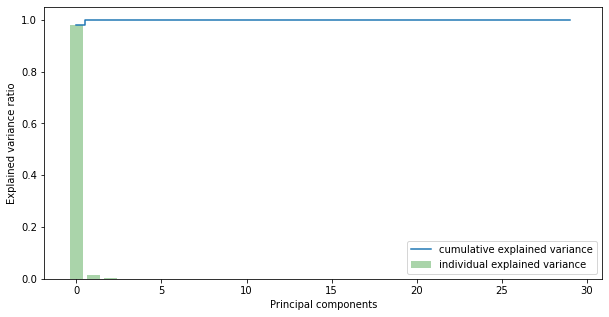

Cumulative explained ratio: [0.98204467 0.99822116 0.99977867 0.9998996  0.99998788 0.99999453
 0.99999854 0.99999936 0.99999971 0.99999989 0.99999996 0.99999998
 0.99999999 0.99999999 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [38]:
# Visualisasi Data Original PCA
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)), 
        var_ratio, 
        alpha=0.3333, 
        align='center', 
        label='individual explained variance', 
        color = 'g')
plt.step(range(len(cum_var_ratio)),
         cum_var_ratio, 
         where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

print("Cumulative explained ratio:",cum_var_ratio)

In [46]:
# Dipilih 15 PC
pca = PCA(n_components=15, random_state=42)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(data=ori_pca_array, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15'])

In [47]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(ori_pca,y, test_size=0.3, random_state=42)

## 6.4 Data Normalisasi PCA

In [43]:
pca = PCA(random_state=42)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(norm_pca_array)
print("Heads of iris_pca:",norm_pca.head())
var_ratio = pca.explained_variance_ratio_
print("\n Explained variance ratio:",var_ratio)
sv = pca.singular_values_
print("\n Singular Value:",sv)

Heads of iris_pca:          0          1         2         3         4         5         6   \
0  9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424  2.159370   
1  2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013358   
2  5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668166   
3  7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429911   
4  3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495 -0.936213   

         7         8         9   ...        20        21        22        23  \
0 -0.398407 -0.157118 -0.877402  ...  0.096515  0.068850  0.084519 -0.175256   
1  0.240988 -0.711905  1.106995  ... -0.077327 -0.094578 -0.217718  0.011290   
2  0.097374  0.024066  0.454275  ...  0.311067 -0.060309 -0.074291  0.102762   
3  1.059565 -1.405440 -1.116975  ...  0.434193 -0.203266 -0.124105  0.153430   
4  0.636376 -0.263805  0.377704  ... -0.116545 -0.017650  0.139454 -0.005332   

         24        25        26        27  

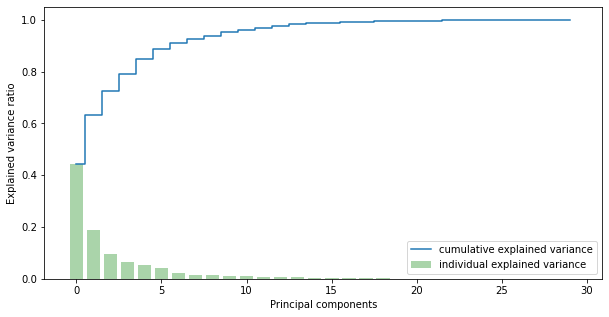

Cumulative explained ratio: [0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


In [44]:
# Visualisasi Data Normalisasi PCA
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)), 
        var_ratio, 
        alpha=0.3333, 
        align='center', 
        label='individual explained variance', 
        color = 'g')
plt.step(range(len(cum_var_ratio)),
         cum_var_ratio, 
         where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

print("Cumulative explained ratio:",cum_var_ratio)

In [45]:
# Dipilih 15 PC
pca = PCA(n_components=15, random_state=42)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(data=norm_pca_array, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15'])


In [48]:
X_train_norm_pca, X_test_norm_pca, y_train_norm_pca, y_test_norm_pca = train_test_split(norm_pca,y, test_size=0.3, random_state=42)

## 7. Menentukan Label Data
Label Data pada konteks dataset ini terletak pada kolom diagnosis, yaitu:
   * class "M" untuk mengidentifikasikan tumor ganas
   * class "B" untuk mengidentifikasikan tumor jinak

## 8. Membangun Model

- Teknik Pemodelan yang dipakai:
    - Menggunakan Decision Tree
    - Parameter yang dipakai:
        - [criterion: gini, entropy]
        - [max_depth]
        - [min sample split]
        - [min sample leaf]
- Skenario Pengujian
    - Menggunakan akurasi, presisi dan recall.
    - Pengujian menggunakan Data Original.
    - Pengujian menggunakan Data yang sudah dinormalisasi.
    - Pengujian menggunakan Data Original yang diberikan PCA.
    - Pengujian menggunakan Data yang sudah dinormalisasi dan diberikan PCA.

## Decision Tree

In [49]:
# Pemodelan Decision Tree
classifier_dt_pipeline = Pipeline([
                          ('model',DecisionTreeClassifier()),                                                
                          ])

In [50]:
parameters_dt = {
                "model__max_depth": np.arange(1,21),
                "model__min_samples_leaf": np.arange(1,101,2),
                "model__min_samples_split": np.arange(2,11),
                "model__criterion": ['gini','entropy'],
                "model__random_state": [42]
}

## 8.1 Pemodelan dengan Data Original

In [51]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [52]:
ori_classifier_dt.fit(X_train,y_train.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [42]})

In [53]:
ori_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        min_samples_leaf=11,
                                        random_state=42))])

In [54]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 3
model__min_samples_leaf: 11
model__min_samples_split: 2
model__random_state: 42


**Visualisasi Decision Tree data Original**

In [118]:
# Mencari nama langkah untuk Decision Tree Classifier dalam pipeline
best_estimator = ori_classifier_dt.best_estimator_
steps = best_estimator.named_steps
classifier_dt_name = next(key for key, value in steps.items() if isinstance(value, tree.DecisionTreeClassifier))

In [119]:
# Membuat objek Decision Tree Classifier terbaik setelah tuning
best_classifier_dt = steps[classifier_dt_name]

In [127]:
# Membuat visualisasi decision tree menggunakan pydotplus
dot_data = tree.export_graphviz(best_classifier_dt, out_file=None,
                               feature_names=X_train.columns,
                               class_names=ori_classifier_dt.best_estimator_.classes_.astype(str),
                               filled=True, rounded=True,
                               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

In [128]:
# Menyimpan visualisasi decision tree dalam format JPG
graph.write_jpg("dt_ori.jpg")

True

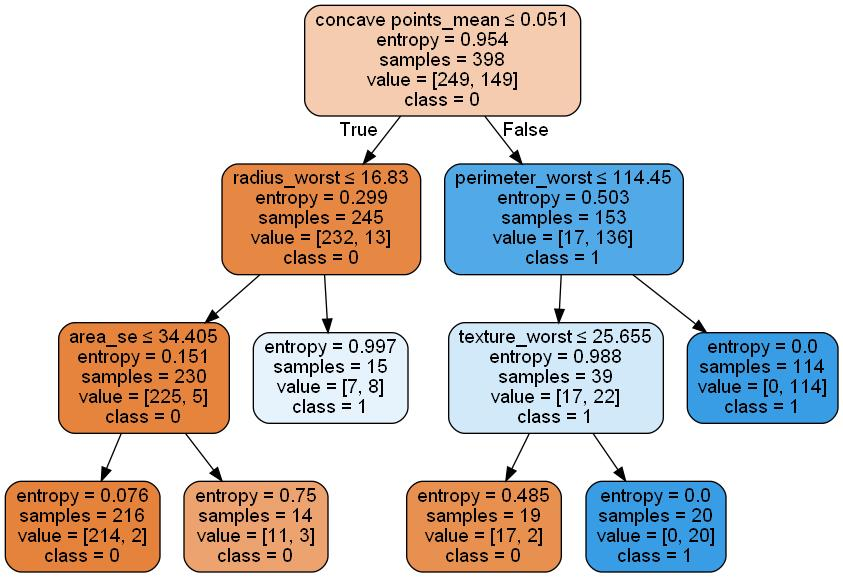

In [130]:
# Menampilkan visualisasi decision tree di Jupyter Notebook
Image(filename="dt_ori.jpg")

## 8.2 Pemodelan dengan Data Normalisasi

In [152]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [153]:
norm_classifier_dt.fit(X_train_norm,y_train_norm.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [42]})

In [154]:
norm_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        min_samples_leaf=11,
                                        random_state=42))])

In [155]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 3
model__min_samples_leaf: 11
model__min_samples_split: 2
model__random_state: 42


**Visualisasi Decision Tree data Normalisasi**

In [156]:
# Mencari nama langkah untuk Decision Tree Classifier dalam pipeline
best_estimator = norm_classifier_dt.best_estimator_
steps = best_estimator.named_steps
classifier_dt_name = next(key for key, value in steps.items() if isinstance(value, tree.DecisionTreeClassifier))

In [157]:
# Membuat objek Decision Tree Classifier terbaik setelah tuning
best_classifier_dt = steps[classifier_dt_name]

In [160]:
# Membuat visualisasi decision tree menggunakan pydotplus
dot_data = tree.export_graphviz(best_classifier_dt, out_file=None,
                               feature_names=[f'Feature {i}' for i in range(X_train_norm.shape[1])],
                               class_names=ori_classifier_dt.best_estimator_.classes_.astype(str),
                               filled=True, rounded=True,
                               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)


In [161]:
# Menyimpan visualisasi decision tree dalam format JPG
graph.write_jpg("dt_norm.jpg")

True

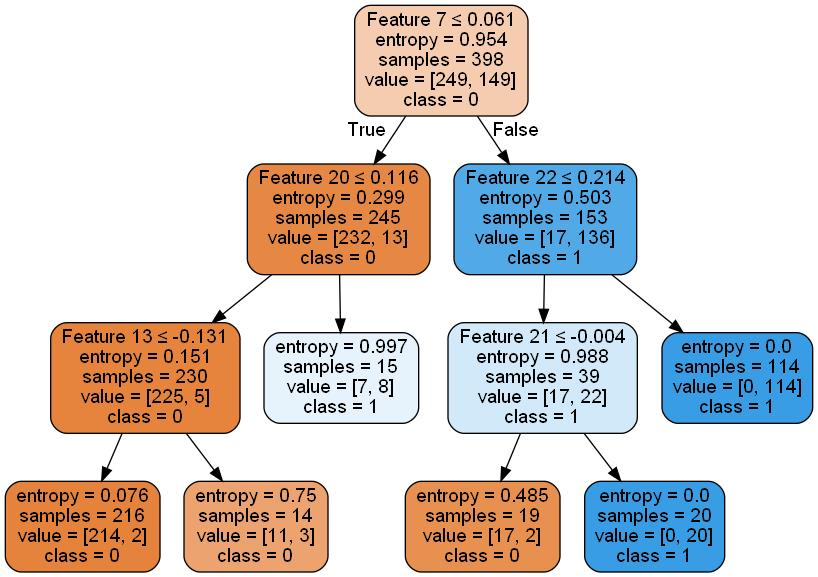

In [162]:
# Menampilkan visualisasi decision tree di Jupyter Notebook
Image(filename="dt_norm.jpg")

## 8.3 Pemodelan dengan Data Original + PCA

In [163]:
ori_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [164]:
ori_pca_classifier_dt.fit(X_train_pca,y_train_pca.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [42]})

In [165]:
ori_pca_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=6, min_samples_leaf=3,
                                        random_state=42))])

In [166]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_pca_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 6
model__min_samples_leaf: 3
model__min_samples_split: 2
model__random_state: 42


**Visualisasi Decision Tree data Original + PCA**

In [167]:
# Mencari nama langkah untuk Decision Tree Classifier dalam pipeline
best_estimator = ori_pca_classifier_dt.best_estimator_
steps = best_estimator.named_steps
classifier_dt_name = next(key for key, value in steps.items() if isinstance(value, tree.DecisionTreeClassifier))

In [168]:
# Membuat objek Decision Tree Classifier terbaik setelah tuning
best_classifier_dt = steps[classifier_dt_name]

In [169]:
# Membuat visualisasi decision tree
dot_data = tree.export_graphviz(best_classifier_dt, out_file=None, 
                               feature_names=[f'PC{i}' for i in range(1, X_train_pca.shape[1]+1)],  
                               class_names=list(map(str, ori_pca_classifier_dt.best_estimator_.classes_)),  
                               filled=True, rounded=True,  
                               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

In [170]:
# Menyimpan visualisasi decision tree dalam format JPG
graph.write_jpg("dt_ori_pca.jpg")

True

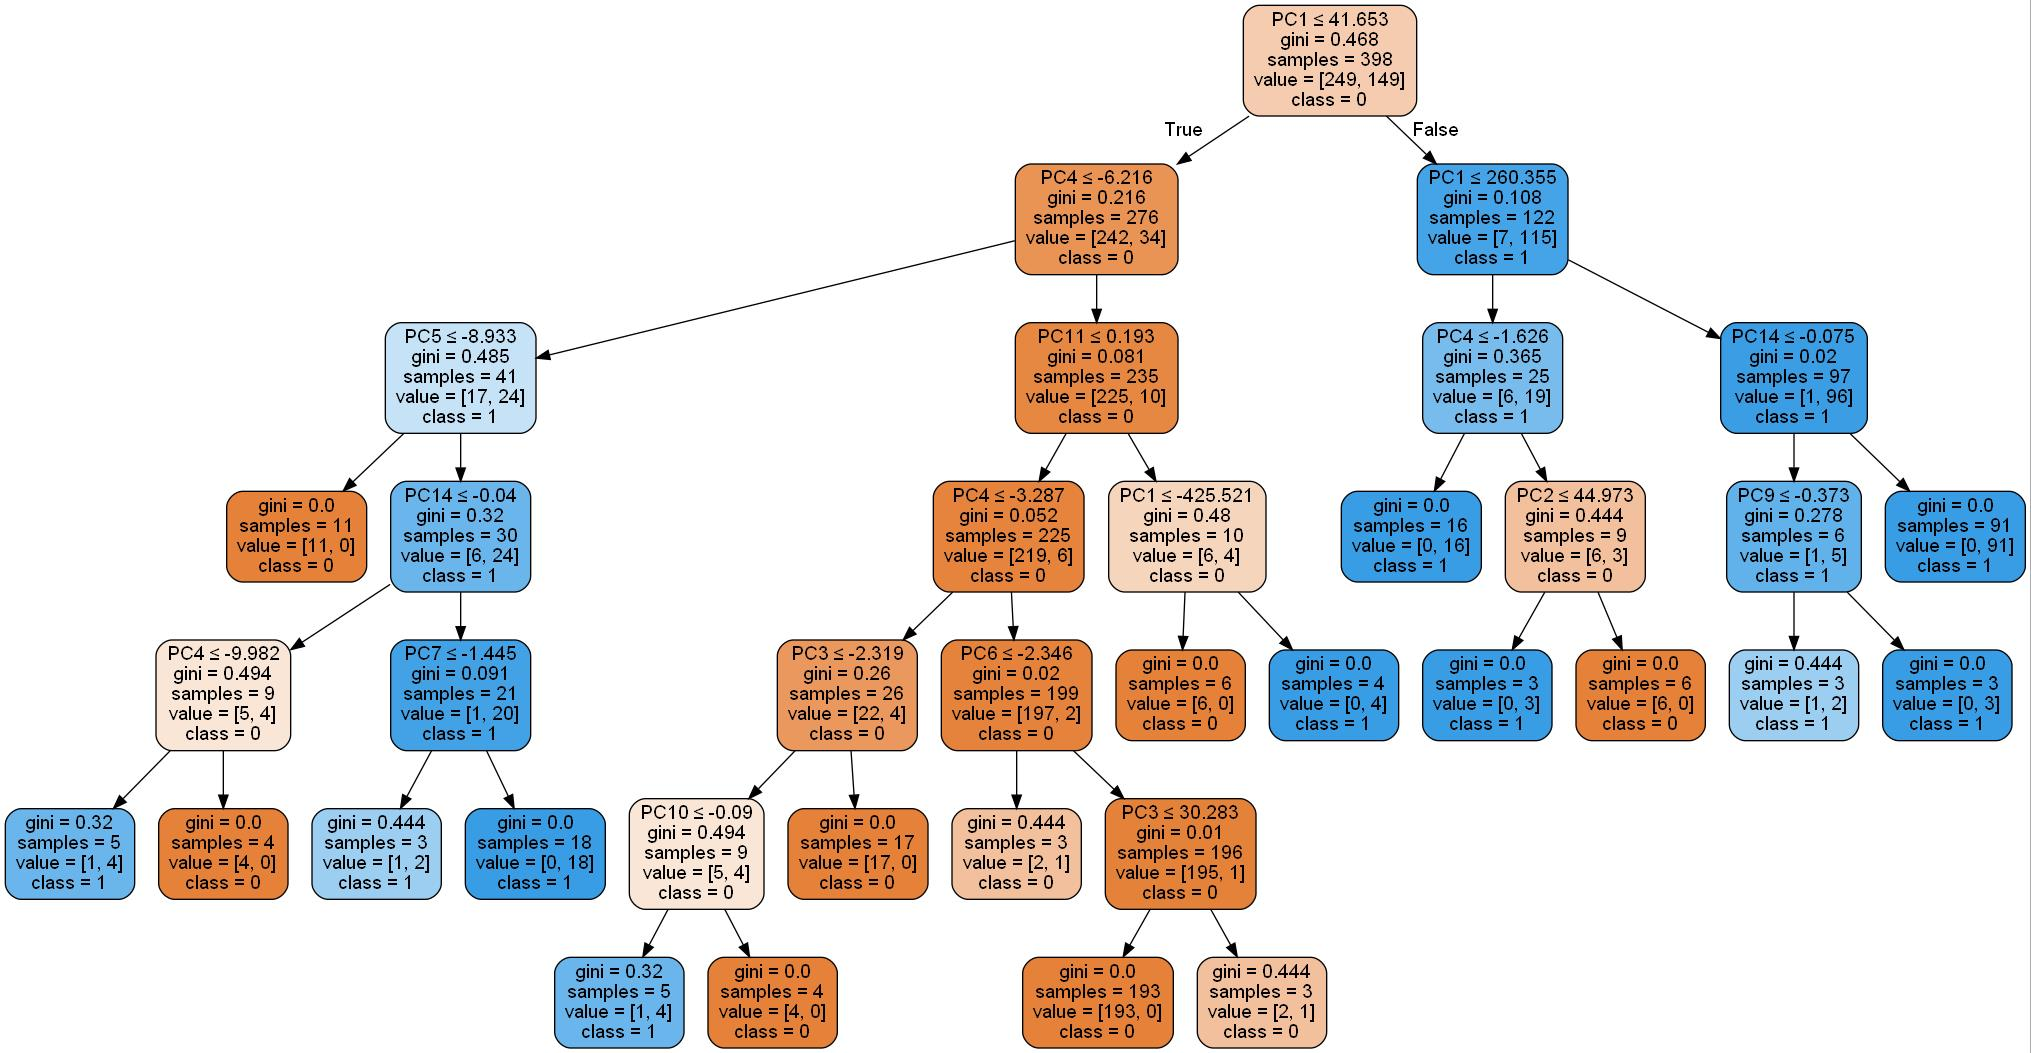

In [171]:
# Menampilkan visualisasi decision tree di Jupyter Notebook
Image(filename="dt_ori_pca.jpg")

## 8.4 Pemodelan dengan Data Normalisasi + PCA

In [172]:
norm_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [173]:
norm_pca_classifier_dt.fit(X_train_norm_pca,y_train_norm_pca.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [42]})

In [174]:
norm_pca_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=5, random_state=42))])

In [175]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_pca_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 5
model__min_samples_leaf: 5
model__min_samples_split: 2
model__random_state: 42


**Visualisasi Decision Tree data Normalisasi + PCA**

In [176]:
# Mencari nama langkah untuk Decision Tree Classifier dalam pipeline
best_estimator = norm_pca_classifier_dt.best_estimator_
steps = best_estimator.named_steps
classifier_dt_name = next(key for key, value in steps.items() if isinstance(value, tree.DecisionTreeClassifier))

In [177]:
# Membuat objek Decision Tree Classifier terbaik setelah tuning
best_classifier_dt = steps[classifier_dt_name]

In [179]:
# Membuat visualisasi decision tree
dot_data = tree.export_graphviz(best_classifier_dt, out_file=None, 
                               feature_names=[f'PC{i}' for i in range(1, X_train_norm_pca.shape[1]+1)],  
                               class_names=list(map(str, norm_pca_classifier_dt.best_estimator_.classes_)),  
                               filled=True, rounded=True,  
                               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

In [180]:
# Menyimpan visualisasi decision tree dalam format JPG
graph.write_jpg("dt_norm_pca.jpg")

True

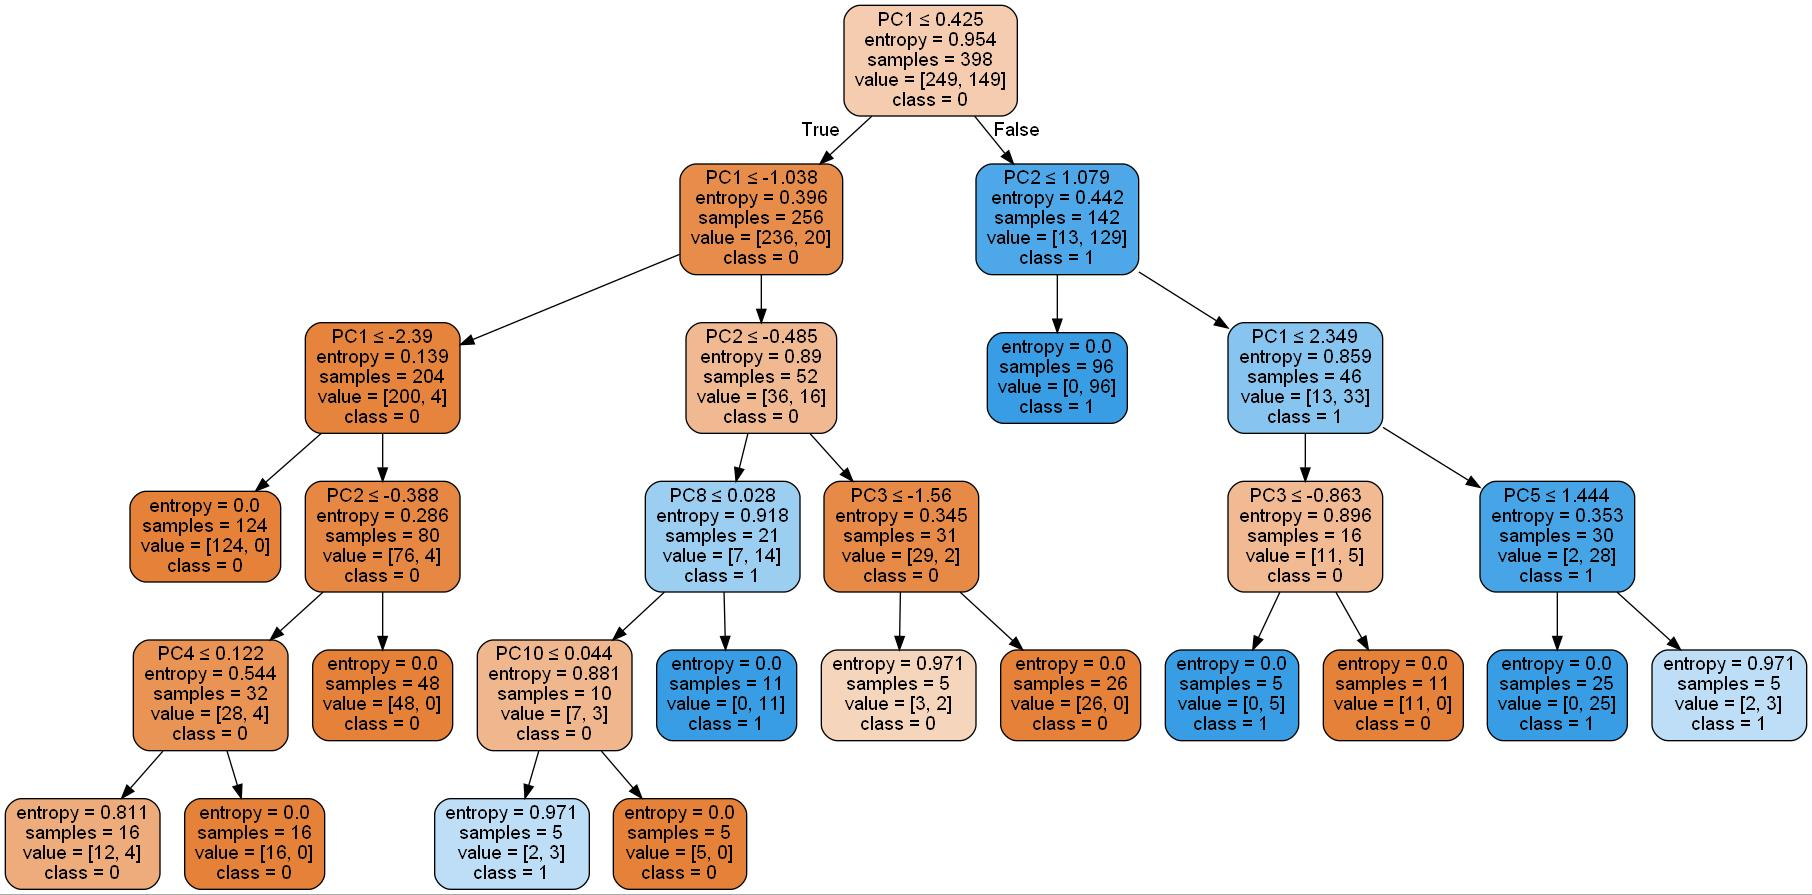

In [181]:
# Menampilkan visualisasi decision tree di Jupyter Notebook
Image(filename="dt_norm_pca.jpg")

## 9. Evaluasi Hasil Pemodelan

## 9.1 Evaluasi dengan Data Original

In [182]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)

ori_accuracy_dt_train = accuracy_score(y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(y_train,ori_y_pred_dt_train)
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(y_train,ori_y_pred_dt_train)
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)

ori_accuracy_dt_test = accuracy_score(y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(y_test,ori_y_pred_dt_test)
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(y_test,ori_y_pred_dt_test)
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.964824120603015
Precision pada training set:  0.9530201342281879
Recall pada training set:  0.9530201342281879
Akurasi pada test set:  0.9649122807017544
Precision pada test set:  0.9672131147540983
Recall pada test set:  0.9365079365079365


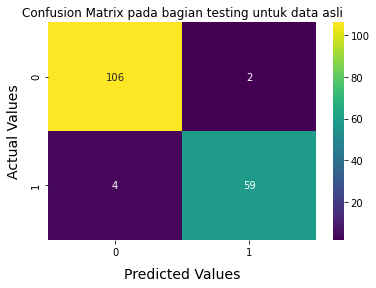

In [183]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

## 9.2 Evaluasi dengan Data Normalisasi

In [184]:
norm_y_pred_dt_train = norm_classifier_dt.predict(X_train_norm)

norm_accuracy_dt_train = accuracy_score(y_train_norm,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)

norm_precision_dt_train = precision_score(y_train_norm,norm_y_pred_dt_train)
print('Precision pada training set: ', norm_precision_dt_train)

norm_recall_dt_train = recall_score(y_train_norm,norm_y_pred_dt_train)
print('Recall pada training set: ', norm_recall_dt_train)

norm_y_pred_dt_test = norm_classifier_dt.predict(X_test_norm)

norm_accuracy_dt_test = accuracy_score(y_test_norm,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)

norm_precision_dt_test = precision_score(y_test_norm,norm_y_pred_dt_test)
print('Precision pada test set: ', norm_precision_dt_test)

norm_recall_dt_test = recall_score(y_test_norm,norm_y_pred_dt_test)
print('Recall pada test set: ', norm_recall_dt_test)

Akurasi pada training set:  0.964824120603015
Precision pada training set:  0.9530201342281879
Recall pada training set:  0.9530201342281879
Akurasi pada test set:  0.9649122807017544
Precision pada test set:  0.9672131147540983
Recall pada test set:  0.9365079365079365


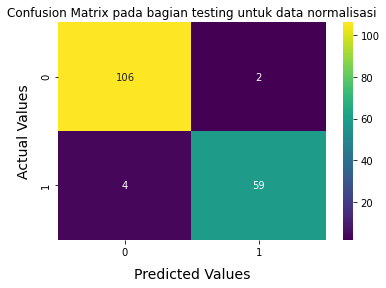

In [185]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data normalisasi')
plt.show()

## 9.3 Evaluasi PCA dengan Data Original

In [186]:
ori_pca_y_pred_dt_train = ori_pca_classifier_dt.predict(X_train_pca)

ori_pca_accuracy_dt_train = accuracy_score(y_train_pca,ori_pca_y_pred_dt_train)
print('Akurasi pada training set: ', ori_pca_accuracy_dt_train)

ori_pca_precision_dt_train = precision_score(y_train_pca,ori_pca_y_pred_dt_train)
print('Precision pada training set: ', ori_pca_precision_dt_train)

ori_pca_recall_dt_train = recall_score(y_train_pca,ori_pca_y_pred_dt_train)
print('Recall pada training set: ', ori_pca_recall_dt_train)

ori_pca_y_pred_dt_test = ori_pca_classifier_dt.predict(X_test_pca)

ori_pca_accuracy_dt_test = accuracy_score(y_test_pca,ori_pca_y_pred_dt_test)
print('Akurasi pada test set: ', ori_pca_accuracy_dt_test)

ori_pca_precision_dt_test = precision_score(y_test_pca,ori_pca_y_pred_dt_test)
print('Precision pada test set: ', ori_pca_precision_dt_test)

ori_pca_recall_dt_test = recall_score(y_test_pca,ori_pca_y_pred_dt_test)
print('Recall pada test set: ', ori_pca_recall_dt_test)

Akurasi pada training set:  0.9849246231155779
Precision pada training set:  0.9735099337748344
Recall pada training set:  0.9865771812080537
Akurasi pada test set:  0.9239766081871345
Precision pada test set:  0.8571428571428571
Recall pada test set:  0.9523809523809523


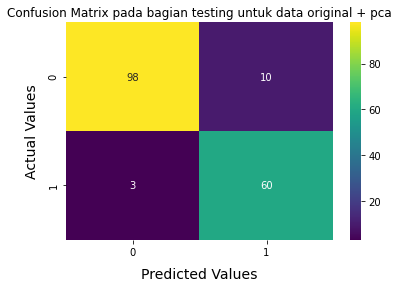

In [187]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(y_test_pca,ori_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data original + pca')
plt.show()

## 9.4 Evaluasi PCA dengan Data Normalisasi

In [188]:
norm_pca_y_pred_dt_train = norm_pca_classifier_dt.predict(X_train_norm_pca)

norm_pca_accuracy_dt_train = accuracy_score(y_train_norm_pca,norm_pca_y_pred_dt_train)
print('Akurasi pada training set: ', norm_pca_accuracy_dt_train)

norm_pca_precision_dt_train = precision_score(y_train_norm_pca,norm_pca_y_pred_dt_train)
print('Precision pada training set: ', norm_pca_precision_dt_train)

norm_pca_recall_dt_train = recall_score(y_train_norm_pca,norm_pca_y_pred_dt_train)
print('Recall pada training set: ', norm_pca_recall_dt_train)

norm_pca_y_pred_dt_test = norm_pca_classifier_dt.predict(X_test_norm_pca)

norm_pca_accuracy_dt_test = accuracy_score(y_test_norm_pca,norm_pca_y_pred_dt_test)
print('Akurasi pada test set: ', norm_pca_accuracy_dt_test)

norm_pca_precision_dt_test = precision_score(y_test_norm_pca,norm_pca_y_pred_dt_test)
print('Precision pada test set: ', norm_pca_precision_dt_test)

norm_pca_recall_dt_test = recall_score(y_test_norm_pca,norm_pca_y_pred_dt_test)
print('Recall pada test set: ', norm_pca_recall_dt_test)

Akurasi pada training set:  0.9748743718592965
Precision pada training set:  0.9727891156462585
Recall pada training set:  0.959731543624161
Akurasi pada test set:  0.9532163742690059
Precision pada test set:  0.9104477611940298
Recall pada test set:  0.9682539682539683


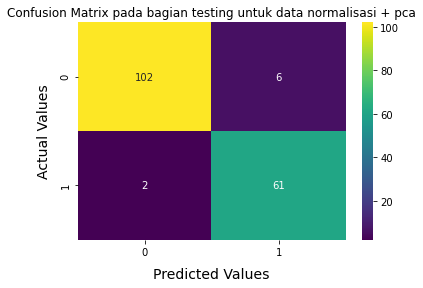

In [189]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(y_test_norm_pca,norm_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data normalisasi + pca')
plt.show()

## Review Pemodelan

In [190]:
models = [
          ('Decision Tree Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test),
          ('Decision Tree Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test),
          ('Decision Tree PCA Data Original', ori_pca_accuracy_dt_train, ori_pca_accuracy_dt_test),    
          ('Decision Tree PCA Data Normalisasi', norm_pca_accuracy_dt_train, norm_pca_accuracy_dt_test),      
         ]

In [191]:
# Melakukan perbandingan hasil training akurasi dan test akurasi dengan 4 model
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Decision Tree Data Original,0.964824,0.964912
1,Decision Tree Data Normalisasi,0.964824,0.964912
2,Decision Tree PCA Data Original,0.984925,0.923977
3,Decision Tree PCA Data Normalisasi,0.974874,0.953216


In [192]:
models_comparison = [
                        ('Decision Tree Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test), 
                        ('Decision Tree Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test),
                        ('Decision Tree PCA Data Original', ori_pca_accuracy_dt_test, ori_pca_recall_dt_test, ori_pca_precision_dt_test),
                        ('Decision Tree PCA Data Normalisasi', norm_pca_accuracy_dt_test, norm_pca_recall_dt_test, norm_pca_precision_dt_test),                  
                    ]

In [193]:
# Melakukan perbandingan hasil Akurasi, Presisi dan Recall pada data Testing dengan 4 model
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Decision Tree Data Original,0.964912,0.936508,0.967213
1,Decision Tree Data Normalisasi,0.964912,0.936508,0.967213
2,Decision Tree PCA Data Original,0.923977,0.952381,0.857143
3,Decision Tree PCA Data Normalisasi,0.953216,0.968254,0.910448


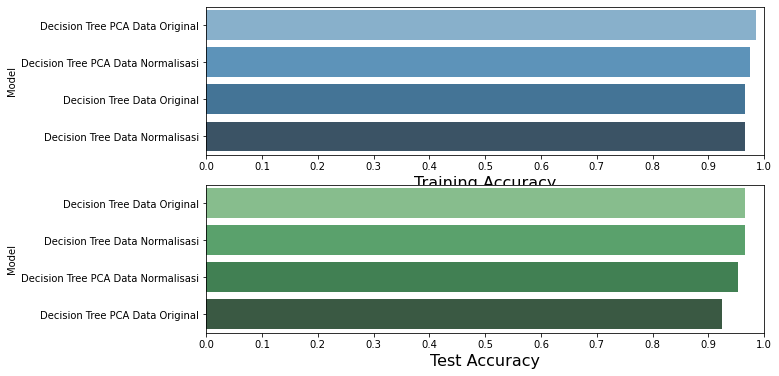

In [194]:
# Visualisasi Perbandingan 4 model dengan Seaborn

f, axes = plt.subplots(2,1, figsize=(10,6))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

# Kesimpulan

1. Data yang diberikan dapat dikatakan cukup besar yaitu 569 data
2. Data yang diberikan sudah bersih (terbukti tidak ada data bernilai null ataupun duplikat)
3. Varibel independen sebanyak 30 variabel
4. Variabel dependen terbagi menjadi 2 kategori yaitu:
    * M = Malignant (Ganas)
    * B = Benign (Jinak)
5. Pembagian data training dan data testing yang saya lakukan adalah 70 / 30, dimana 70% adalah data training dan 30% adalah data testing
6. Model Decision Tree dengan data normalisasi dan dengan data original menghasilkan hasil yang sama yaitu pada **data training sebesar 96%** dan juga pada **data testing sebesar 96%**
7. Menurut pendapat penulis, implementasi model dengan data normalisasi akan lebih baik karena data lebih terdistribusi secara merata dalam rentang yang sama. 

**Sekian & Terimakasih**